In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import *

In [32]:
data = pd.read_csv("/content/data.csv")
print(data.isna().sum())
data.drop(["Tarih", "exp_avg_outages_24h"], inplace=True, axis=1)
data

Tarih                     0
Dağıtılan Enerji (MWh)    0
Yıl                       0
Ay                        0
Gün                       0
Quarter                   0
day_of_week               0
day_of_year               0
hour                      0
week_of_year              0
holiday                   0
weekend                   0
electrical_outage         0
time_of_day               0
business_day              0
cumulative_holidays       0
outage_percentage         0
rolling_outages_24h       0
exp_avg_outages_24h       0
hour_sin                  0
hour_cos                  0
is_spring                 0
is_summer                 0
is_autumn                 0
is_winter                 0
is_weekend                0
is_weekday                0
dtype: int64


,Dağıtılan Enerji (MWh),Yıl,Ay,Gün,Quarter,day_of_week,day_of_year,hour,week_of_year,holiday,...,outage_percentage,rolling_outages_24h,hour_sin,hour_cos,is_spring,is_summer,is_autumn,is_winter,is_weekend,is_weekday
0,1593.944216,2018,1,1,1,0,1,0,1,1,...,0.000000,0.0,0.000000,1.000000,0,0,0,1,0,-1
1,1513.933887,2018,1,1,1,0,1,1,1,1,...,0.000000,0.0,0.258819,0.965926,0,0,0,1,0,-1
2,1402.612637,2018,1,1,1,0,1,2,1,1,...,0.000000,0.0,0.500000,0.866025,0,0,0,1,0,-1
3,1278.527266,2018,1,1,1,0,1,3,1,1,...,0.000000,0.0,0.707107,0.707107,0,0,0,1,0,-1
4,1220.697701,2018,1,1,1,0,1,4,1,1,...,0.000000,0.0,0.866025,0.500000,0,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40147,2492.489498,2022,7,31,3,6,212,19,30,0,...,1.793365,0.0,-0.965926,0.258819,0,1,0,0,1,-2
40148,2479.958245,2022,7,31,3,6,212,20,30,0,...,1.793320,0.0,-0.866025,0.500000,0,1,0,0,1,-2
40149,2485.016884,2022,7,31,3,6,212,21,30,0,...,1.793275,0.0,-0.707107,0.707107,0,1,0,0,1,-2
40150,2396.574255,2022,7,31,3,6,212,22,30,0,...,1.793231,0.0,-0.500000,0.866025,0,1,0,0,1,-2


In [33]:
train_df = data.iloc[:36000]
print(train_df.isna().sum())
test_df = data.iloc[36000:]

Dağıtılan Enerji (MWh)    0
Yıl                       0
Ay                        0
Gün                       0
Quarter                   0
day_of_week               0
day_of_year               0
hour                      0
week_of_year              0
holiday                   0
weekend                   0
electrical_outage         0
time_of_day               0
business_day              0
cumulative_holidays       0
outage_percentage         0
rolling_outages_24h       0
hour_sin                  0
hour_cos                  0
is_spring                 0
is_summer                 0
is_autumn                 0
is_winter                 0
is_weekend                0
is_weekday                0
dtype: int64


In [34]:
train_feats, train_tar = train_df.drop(["Dağıtılan Enerji (MWh)"], axis=1), train_df["Dağıtılan Enerji (MWh)"].values
test_feats, test_tar = test_df.drop(["Dağıtılan Enerji (MWh)"], axis=1), test_df["Dağıtılan Enerji (MWh)"].values

In [35]:
train_feats.isna().sum()

Yıl                    0
Ay                     0
Gün                    0
Quarter                0
day_of_week            0
day_of_year            0
hour                   0
week_of_year           0
holiday                0
weekend                0
electrical_outage      0
time_of_day            0
business_day           0
cumulative_holidays    0
outage_percentage      0
rolling_outages_24h    0
hour_sin               0
hour_cos               0
is_spring              0
is_summer              0
is_autumn              0
is_winter              0
is_weekend             0
is_weekday             0
dtype: int64

In [36]:
import matplotlib.pyplot as plt
# plt.hist(train_tar)

In [44]:
normalizer = Normalization(mean=train_feats.mean().values, variance=train_feats.var().values)

In [45]:
train_feats.mean().values.shape

(24,)

In [46]:
# import numpy as np
# train_feats = np.expand_dims(train_feats, axis=-1)
# test_feats = np.expand_dims(test_feats, axis=-1)

# train_feats.shape, test_feats.shape

In [47]:
train_feats.shape[-1]

24

In [53]:
input_layer = tf.keras.Input((train_feats.shape[-1], ))
normalized_vals = normalizer(input_layer)
x = Lambda(lambda x: tf.expand_dims(x, -1))(normalized_vals)
x = Conv1D(32, 3, activation = tf.nn.leaky_relu, padding="valid")(x)
x = Conv1D(64, 3, activation = tf.nn.leaky_relu, padding="valid")(x)
x = BatchNormalization()(x)
residual_1 = AveragePooling1D(3)(x)

x = Conv1D(64, 3, activation = tf.nn.leaky_relu, padding="same")(residual_1)
x = Conv1D(64, 3, activation = tf.nn.leaky_relu, padding="same")(x)
x = BatchNormalization()(x)
residual_2 = tf.keras.layers.Concatenate()([x, residual_1])


x = Conv1D(128, 3, activation = tf.nn.leaky_relu, padding="same")(residual_2)
x = Conv1D(128, 3, activation = tf.nn.leaky_relu, padding="same")(x)
x = BatchNormalization()(x)
residual_3 = tf.keras.layers.Concatenate()([x, residual_2])

x = GlobalAveragePooling1D()(residual_3)
x = Dense(128)(x)
x = tf.nn.leaky_relu(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)

model = tf.keras.Model(input_layer, x)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 normalization_3 (Normalization  (None, 24)          0           ['input_7[0][0]']                
 )                                                                                                
                                                                                                  
 lambda_4 (Lambda)              (None, 24, 1)        0           ['normalization_3[1][0]']        
                                                                                                  
 conv1d_24 (Conv1D)             (None, 22, 32)       128         ['lambda_4[0][0]']         

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [57]:
def trans_encoder(inputs, heads, num_heads, ff_dimension, drop_rate=0.1):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=heads,
                           num_heads=num_heads,
                           dropout=drop_rate)(x, x)
    x = Dropout(drop_rate)(x)
    residual = tf.keras.layers.Add()([x, inputs])

    # FF
    x = LayerNormalization(epsilon=1e-6)(residual)
    x = Conv1D(ff_dimension, kernel_size=1, activation="relu")(x)
    x = Dropout(drop_rate)(x)
    x = Conv1D(inputs.shape[-1], kernel_size=1, activation="relu")(x)
    return tf.keras.layers.Add()([x, inputs])

In [69]:
def transformer_model(
    input_shape,
    heads,
    num_heads,
    ff_dimension,
    num_encoder_blocks,
    dense_units,
    encoder_dropout,
    dense_dropout,
):
    input_layer = tf.keras.Input(input_shape)
    input_layer = normalizer(input_layer)
    input_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, -1))(input_layer)

    x = input_layer
    for mahmut in range(num_encoder_blocks):
        x = trans_encoder(x, heads, num_heads, ff_dimension, drop_rate=encoder_dropout)

    x = GlobalAveragePooling1D(data_format="channels_first")(x)

    for dim in dense_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(dense_dropout)(x)
    x = Dense(1)(x)

    model = tf.keras.Model(input_layer, x)
    return model

In [70]:
model = transformer_model(
    input_shape = (24, ),
    heads = 128,
    num_heads=4,
    ff_dimension=4,
    num_encoder_blocks=4,
    dense_units=[128],
    encoder_dropout=0.15,
    dense_dropout=0.3
)

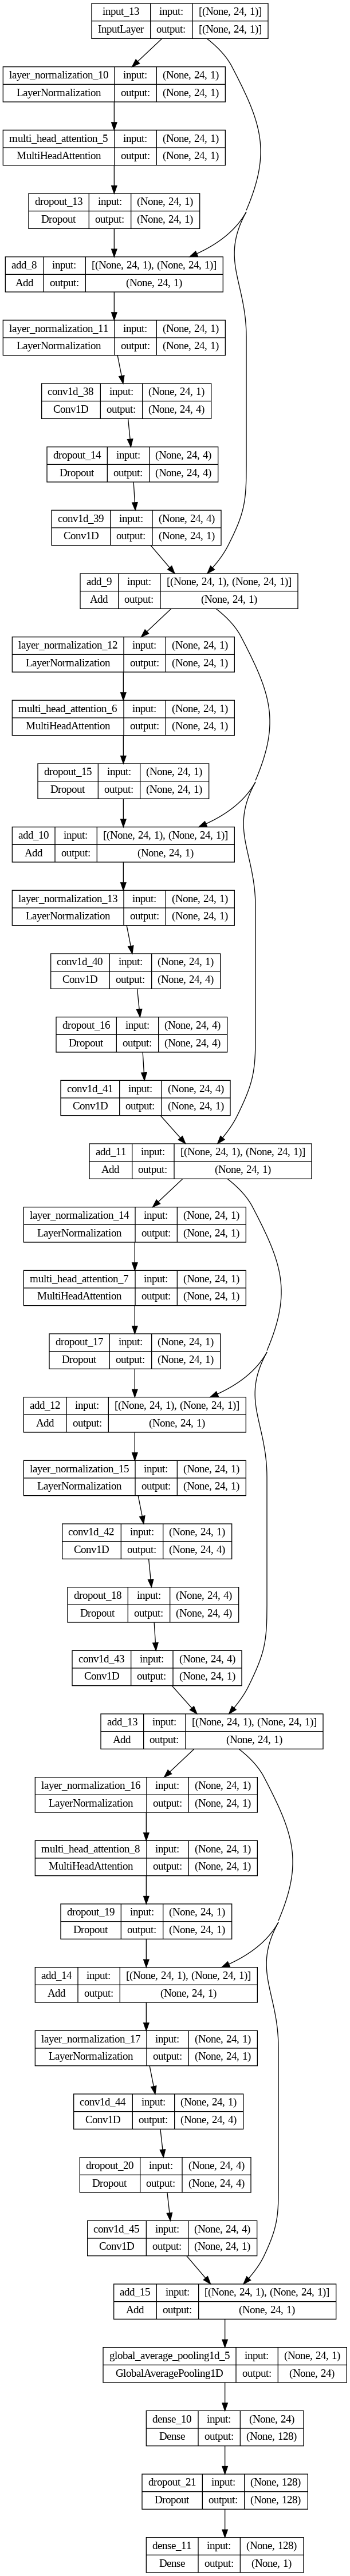

In [71]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [77]:
model = tf.keras.Sequential([
    normalizer,
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(1)
])

In [78]:
decay_steps = 1000
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    1e-3, decay_steps)

optimizer = tf.keras.optimizers.Adam(lr_decayed_fn)

# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss"
# )

model.compile(
    loss="mape", optimizer=optimizer, metrics=["mse", "mae", tf.keras.metrics.RootMeanSquaredError()]
)

In [79]:
model.fit(train_feats, train_tar, validation_data =(test_feats, test_tar), 
          batch_size = 128, verbose=1, epochs=20)

Epoch 1/20
282/282 [==============================] - 3s 5ms/step - loss: 98.9881 - mse: 3496295.2500 - mae: 1819.5967 - root_mean_squared_error: 1869.8383 - val_loss: 97.3368 - val_mse: 3409446.0000 - val_mae: 1796.0847 - val_root_mean_squared_error: 1846.4685
Epoch 2/20
282/282 [==============================] - 1s 4ms/step - loss: 94.2115 - mse: 3236223.5000 - mae: 1741.2312 - root_mean_squared_error: 1798.9507 - val_loss: 92.5013 - val_mse: 3149790.5000 - val_mae: 1716.6470 - val_root_mean_squared_error: 1774.7649
Epoch 3/20
282/282 [==============================] - 1s 4ms/step - loss: 90.0760 - mse: 3023932.5000 - mae: 1673.7332 - root_mean_squared_error: 1738.9458 - val_loss: 90.5264 - val_mse: 3048678.7500 - val_mae: 1684.2888 - val_root_mean_squared_error: 1746.0466
Epoch 4/20
282/282 [==============================] - 1s 4ms/step - loss: 89.1471 - mse: 2977671.5000 - mae: 1658.5601 - root_mean_squared_error: 1725.5931 - val_loss: 90.4313 - val_mse: 3043876.5000 - val_mae: 168

KeyboardInterrupt: ignored

In [107]:
preds = model.predict(test_feats)

130/130 [==============================] - 2s 10ms/step


In [108]:
preds

array([[1608.3732],
       [1543.4989],
       [1474.478 ],
       ...,
       [2211.1482],
       [2113.4539],
       [2004.325 ]], dtype=float32)

In [109]:
mape_keras = tf.keras.losses.MeanAbsolutePercentageError(reduction="none")
mape_keras(test_tar, preds.squeeze())

<tf.Tensor: shape=(), dtype=float32, numpy=8.948486>

In [ ]:
# time_steps = 24

# X_3d = []
# for i in range(0, len(X_scaled) - time_steps, time_steps):
#     X_3d.append(X_scaled[i:i+time_steps])

# X_3d = np.array(X_3d)


# y_2d = []
# for i in range(time_steps, len(y), time_steps):
#     y_2d.append(y[i])

# y_2d = np.array(y_2d)

# X_test_3d = []
# for i in range(0, len(X_test_scaled) - time_steps, time_steps):
#     X_test_3d.append(X_test_scaled[i:i+time_steps])

# X_test_3d = np.array(X_test_3d)


# y_test_2d = []
# for i in range(time_steps, len(y_test), time_steps):
#     y_test_2d.append(y_test[i])

# y_test_2d = np.array(y_test_2d)


# X_forecast_3d = []
# for i in range(0, len(X_forecast_scaled) - time_steps, time_steps):
#     X_forecast_3d.append(X_forecast_scaled[i:i+time_steps])

# X_forecast_3d = np.array(X_forecast_3d)